# 1. 일단 csv 파일을 먼저 열어봅시다.

In [ ]:
import csv # csv 라이브러리를 임포트

f = open('weather.csv', 'r') # weather.csv 를 읽기 모드로 열어봅시다.
data = csv.reader(f) # csv 모듈에서는  reader 함수로 파일을 읽습니다.
count = 0
for row in data : # 이 data 는 csv object 이기 때문에, data 자체를 출력해서는 확인할 수 없습니다.
  print(row) # 그래서 이렇게 따로 한줄씩 읽어서 print 를 해주어야합니다.
  ''' data 가 너무 길어서, 3줄만 출력하기 위해 아래 코드를 짠 것입니다'''
  count += 1
  if count == 3:
    break

f.close()


['Date', 'degree', 'speed', 'avg_speed']
['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']


## (1-1) 헤더를 제거하기 위해서는 next() 함수를 사용합니다.

In [ ]:
import csv

f = open('weather.csv', 'r') # 읽기 모드로 열어봅시다.
data = csv.reader(f) # 열린 파일의 변수를 csv 모듈의 reader 함수로 읽어봅시다.
header = next(data) # 해당 데이터를 next() 함수에 적용하면, 첫번째 줄만 떼어냅니다.
print('header', header) # 헤더가 어떻게 떼어졌는지 봅시다.

''' 다시 출력: 헤더가 떼어졌나 맨 위 3줄만 봅시다'''
count = 0
for row in data : # data 에 저장된 csv object 를 열겠습니다.
  print(row)
  count += 1
  if count == 3: # count 가 3 이 되면, for 문이 끝나게 해봅시다.
    break
f.close()


header ['Date', 'degree', 'speed', 'avg_speed']
['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']
['2010-08-03', '22.1', '6.3', '2.9']


## (1-2) 평균 풍속 데이터만 따로 떼어내 봅시다.

In [ ]:
import csv

f = open('weather.csv', 'r')
data = csv.reader(f)
header = next(data) # data 의 헤더를 지워봅시다.
print('header', header)
count = 0
for row in data :
  print(row[3]) # data 의 각 줄 (row) 의 네번째 (인덱스로 3)에 평균풍속이 저장되어있습니다.
                # 확인해봅시다.
  ''' 세줄만 출력하도록 하는 부분 시작'''
  count += 1
  if count == 3:
    break
f.close()


header ['Date', 'degree', 'speed', 'avg_speed']
3.4
3.8
2.9


## (1-3) 이 평균풍속에서 최대풍속을 구하려고 하는데, 기록이 없는 데이터 (즉, 비어있는 문자열 '') 도 있네요. 이를 걸러내면서, 최대 풍속을 어떻게 구하면 좋을까요?

In [ ]:
max_wind = -100 # 왜 이렇게 정의했을까요? 다른 값은 무엇이 가능할까요?

''' csv 파일을 읽어옵니다 '''
f = open('weather.csv', 'r')
data = csv.reader(f)
header = next(data) # 헤더를 지웁시다.

''' 읽어온 파일을 한줄 한줄 읽어봅시다 '''
for row in data : # data 의 각 한줄한줄을 읽어오도록 반복문 사용
  if row[3] == '' : # 평균 풍속 데이터가 없으면, wind 에 0 을 기록합니다.
    wind = 0
  else : # 평균풍속 데이터가 있는 경우
    wind = float(row[3]) # wind 는 읽어온 데이터의 한 줄 row 의 3번째 인덱스 열을 저장합니다.

  ''' 최대값 업데이트 '''
  if max_wind < wind : # 저장한 wind 가 최대값보다 크면, 방금 읽어온 wind 를 max_wind 로
                       # 업데이트합니다.
    max_wind = wind
f.close()


In [ ]:
# 최대 평균속도를 출력해봅시다.
print('최대풍속은 {} 입니다.'.format(max_wind))

최대풍속은 14.9 입니다.


## (1-4) 매월 평균 풍속을 그래프로 그려서, 몇 월에 가장 강한 바람이 부는지 알고 싶습니다.

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np

''' 1. 일단 파일 읽어오기'''
f = open('weather.csv', 'r')
data = csv.reader(f)
header = next(data)

''' 2. 매월 평균풍속을 구해 저장할 리스트를 초기화하기 '''
month_wind = np.zeros((1,12))  # 매달 풍속을 담을 리스트 초기화. 총 12달이니까, 1행 12열로 만듭시다.
day_counts = np.zeros((1,12))  # 각 달마다 측정된 날짜를 세기 위한 리스트 초기화. 각 달마다 기록수를 저장할 것이니, 여기도 1행 12열


''' 3. 달 (month) 정보를 추출하여 평균을 기록해보자 '''
for row in data : # data 의 각 한줄한줄을 읽어오도록 반복문 사용
  month = row[0].split('-')[1] # 첫번째열의 문자를 - 로 분리해서, 월만 분리해봅시다. 월은 몇번째 인덱스일까요?
  month = int(month) # month 는 '05' 혹은 '06' 형태의 문자열이니 정수로 변경
  print(month)
  ''' 4. 요 아래로 날수와 평균풍속을 더하겠습니다 '''
  # 다음 스텝으로
f.close()


## (1-5) 평균을 구하기 위해, 만든 배열에 값을 더해봅시다.

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np

''' 1. 일단 파일 읽어오기'''
f = open('weather.csv', 'r')
data = csv.reader(f)
header = next(data)

''' 2. 매월 평균풍속을 구해 저장할 리스트를 초기화하기 '''
month_wind = np.zeros((1,12))  # 매달 풍속을 담을 리스트 초기화. 총 12달이니까, 1행 12열로 만듭시다.
day_counts = np.zeros((1,12))  # 각 달마다 측정된 날짜를 세기 위한 리스트 초기화. 각 달마다 기록수를 저장할 것이니, 여기도 1행 12열


''' 3. 달 (month) 정보를 추출하여 평균을 기록해보자 '''
for row in data : # data 의 각 한줄한줄을 읽어오도록 반복문 사용
  month = row[0].split('-')[1] # 첫번째열의 문자를 - 로 분리해서, 월만 분리해봅시다. 월은 몇번째 인덱스일까요?
  month = int(month) # month 는 '05' 혹은 '06' 형태의 문자열이니 정수로 변경
  print(month)
  ''' 4. 요 아래로 날수와 평균풍속을 더하겠습니다 '''
  if row[3] != '':  # 평균풍속에 값이 있을 때만 기록해야겠죠?
    wind = float(row[3]) # 그 때만 값을 저장하도록 합시다.
    month_wind[0, month - 1] += wind # 해당 월에 풍속을 추가하여 더함.
    day_counts[0, month - 1] += 1 # 해당 월에 기록된 날 수를 기록.
f.close()


In [ ]:
month_wind

array([[1164.8, 1105.1, 1356.6, 1377.5, 1308. , 1038.3, 1202. , 1114.8,
        1098.5, 1228.1, 1179.2, 1183.3]])

In [ ]:
day_counts

array([[310., 280., 309., 298., 310., 300., 310., 310., 300., 310., 300.,
        310.]])

## (1-6) 이제 드디어 평균을 구해봅시다.

In [ ]:
# month_wind 는 매달 바람풍속의 총합, day_count 는 기록된 날수의 총합.
# 평균은 어떤값의 총합을 해당 값의 갯수로 나누면 되죠?
avg_monthly_wind = month_wind/day_counts # 어떻게 하면 될까요?
avg_monthly_wind

array([[3.75741935, 3.94678571, 4.39029126, 4.62248322, 4.21935484,
        3.461     , 3.87741935, 3.59612903, 3.66166667, 3.9616129 ,
        3.93066667, 3.81709677]])

## (1-7) 이제 그림으로 표현해봅시다. 하나는 그냥 플롯, 다른 하나는 bar plot 을 그리기 위해 subplots() 를 사용해봅시다.

Text(0.5, 0, 'Month')

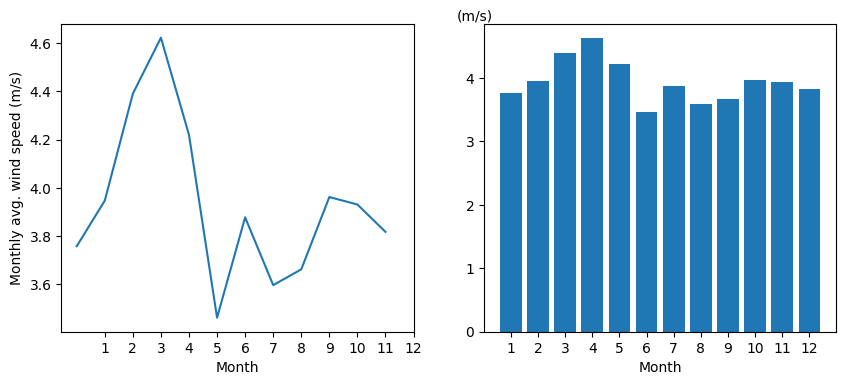

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,4)) # 1행에 2열인 서브 스케치북들을 만들어봅시다.

''' 1. 스케치북을 일단 미리 떼어 정의합시다'''
ax1 = ax[0] # 첫번째
ax2 = ax[1] # 두번째

''' 2. 각 스케치북에 플롯하나, bar plot 하나를 그려봅시다.'''
month_list = [str(i) for i in range(1,13)] # 1부터 12월까지 라벨을 달기 위해

ax1.plot(month_list, avg_monthly_wind[0, :]) # x 축에는 month_list, y 축은 avg_monthly_wind 를 (여기서 인덱스 [0,:] 를 쓴 이유는?)
ax1.set_xticks(range(1,13), month_list) # 여기서 tick 을 맞추려고 하는 겁니다.
ax1.set_xlabel('Month')
ax1.set_ylabel('Monthly avg. wind speed (m/s)')
# 무엇을 더 추가할 수 있을까요? 색이나 마커도 변경해보세요.

''' 3. 그 다음 바플롯! '''
ax2.bar(month_list, avg_monthly_wind[0,:])
ax2.text(-2.0, 4.9, '(m/s)') # text() 함수를 사용해서 단위를 기록해 봅시다.
ax2.set_xlabel('Month')

# 2. Pandas

## (2-1) 일단 써봅시다.

In [ ]:
import numpy as np
import pandas as pd

ser1 = pd.Series([1,2,3, np.nan, 6, 8])
ser2 = pd.Series([2,3,4, 5, np.nan, 9])

''' check'''
ser1 # ser1 을 그냥 쳐봅시다 (print 구문 없이, 모양보기 위해 )

0    1.0
1    2.0
2    3.0
3    NaN
4    6.0
5    8.0
dtype: float64

## (2-2) 개인의 이름, 나이, 성별, 평점 정보를 각각 series 로 만들어봅시다.
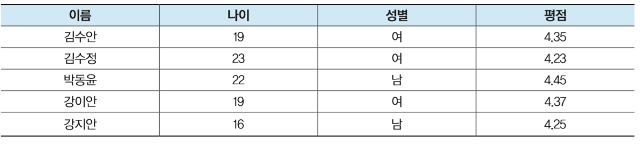

In [ ]:
name_series = pd.Series(['김수안', '김수정', '박동윤', '강이안', '강지안']) # 이름 정보
age_series = pd.Series([19, 23, 22, 19, 16]) # 나이 정보
gender_series = pd.Series(['여', '여', '남', '여', '남'])
grade_series = pd.Series([4.35, 4.23, 4.45, 4.37, 4.25]) # 성적정보
print(age_series, gender_series, grade_series)


0    19
1    23
2    22
3    19
4    16
dtype: int64 0    여
1    여
2    남
3    여
4    남
dtype: object 0    4.35
1    4.23
2    4.45
3    4.37
4    4.25
dtype: float64


## (2-3) 네개의 시리즈를 묶어서, 데이터프레임 dataframe 으로 만들어봅시다. 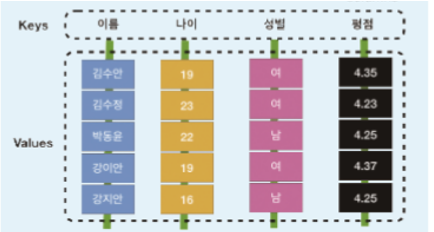

In [ ]:
df = pd.DataFrame({'이름': name_series, '나이': age_series, \
                   '성별': gender_series, '평점': grade_series}) # DataFrame() 을 사용해서 만듦
print(df)

    이름  나이 성별    평점
0  김수안  19  여  4.35
1  김수정  23  여  4.23
2  박동윤  22  남  4.45
3  강이안  19  여  4.37
4  강지안  16  남  4.25


# 3. csv --> pandas.DataFrame

## (3-1) pd.read_csv() 를 사용하여, csv 파일을 바로 데이터프레임으로 만들어봅시다.

In [ ]:
import pandas as pd

df = pd.read_csv('countries.csv') # countries.csv 를 바로 데이터 프레임으로 변경
'''check'''
df

,Unnamed: 0,country,area,capital,population
0,KR,Korea,98480,Seoul,51780579
1,US,USA,9629091,Washington,331002825
2,JP,Japan,377835,Tokyo,125960000
3,CN,China,9596960,Beijing,1439323688
4,RU,Russia,17100000,Moscow,146748600


## (3-2) 특정 열을 인덱스로 쓰고 싶을 때, read_csv() 안에서 옵션으로 index_col = 특정열의인덱스 로 지정해주면 해당 열을 인덱스로 하여 데이터프레임이 형성됩니다.

In [ ]:
import pandas as pd
df2 = pd.read_csv('countries.csv', index_col = 0 ) # countries.csv 를 바로 데이터 프레임으로 변경
'''check'''
df2

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


## (3-3) 특정 열을 선택해봅시다. 두가지 방법이 있습니다.


1.   꺽인 괄호 [] 에 열의 이름을 넣는 방법.
2.   '.' 을 사용하는 방법



In [ ]:
# 첫번째 방법: population 열에 해당하는 정보만 따오려면?
df2_pop_1 = df2['population'] # 열의 이름 넣기
# 두번째 방법: '.' 을 사용하는 방법
df2_pop_2 = df2.population # 마침표를 통해 이어서 부르기

In [ ]:
df2_pop_1

KR      51780579
US     331002825
JP     125960000
CN    1439323688
RU     146748600
Name: population, dtype: int64

In [ ]:
df2_pop_2

KR      51780579
US     331002825
JP     125960000
CN    1439323688
RU     146748600
Name: population, dtype: int64

## (3-4) 여러개의 특정열 부르기

In [ ]:
# 열을 부르는 꺽인 괄호 [] 안에 열의 리스트를 넣어주어야 함. 그래서 꺽인 괄호가 두겹이 됩니다.
df2_multi = df2[['population', 'area']] # 열의 이름 넣기

'''check'''
df2_multi

,population,area
KR,51780579,98480
US,331002825,9629091
JP,125960000,377835
CN,1439323688,9596960
RU,146748600,17100000
